In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

## Loading image

In [2]:
def read_file(filename):
    img=cv2.imread(filename)
    img=cv2.cvtColor(img , cv2.COLOR_BGRA2RGB)
    plt.imshow(img)
    plt.show()
    return img

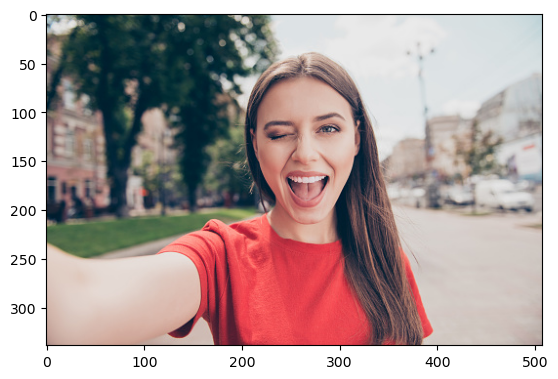

In [3]:
filename="photo.jpg"
img=read_file(filename)
org_img=np.copy(img)

# Creating Edge Mask

In [4]:
def edge_mask(img,line_size,blur_value):
    # Input:Input image 
    # Output: Edges of image    
    gray=cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
    gray_blur=(cv2.medianBlur(gray,blur_value))
    
    edges=cv2.adaptiveThreshold(gray_blur,255,cv2.ADAPTIVE_THRESH_MEAN_C,
                                     cv2.THRESH_BINARY,line_size,blur_value)
    return edges 
    

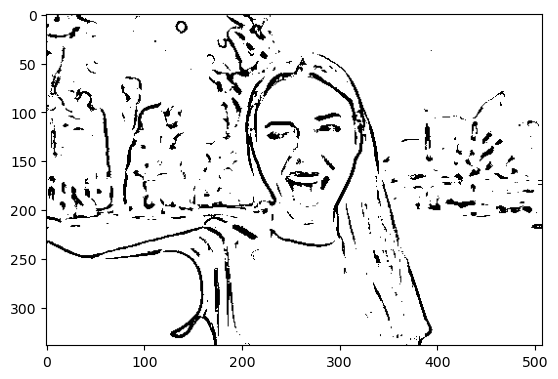

In [5]:
line_size,blur_value=7,7
edges=edge_mask(img,line_size,blur_value)
plt.imshow(edges,cmap="gray")
plt.show()

## Reduce color palette

In [6]:
def color_quantization(img, k):
    #Transform image
    data=np.float32(img).reshape((-1,3))
    
    #Determine criteria
    criteria=(cv2.TERM_CRITERIA_EPS+cv2.TERM_CRITERIA_MAX_ITER,20,0.001)
    
    #implement k-means
    ret,label,center=cv2.kmeans(data, k, None,criteria,10,cv2.KMEANS_RANDOM_CENTERS)
    center=np.uint8(center)
    
    result=center[label.flatten()]
    result=result.reshape(img.shape)
    return result 

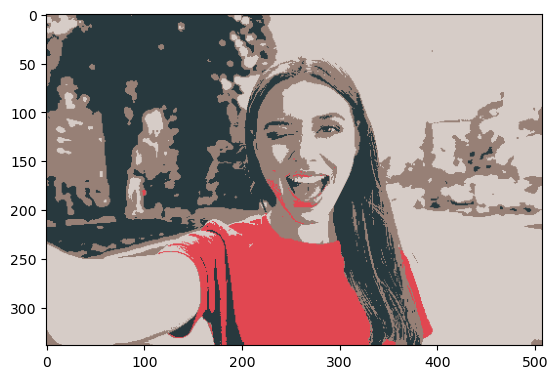

In [7]:
img_quantized=color_quantization(img,k=4)
plt.imshow(img_quantized)
plt.show()

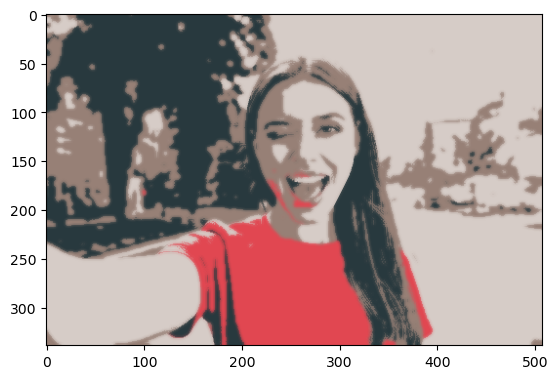

In [8]:
# Reduce the noise 
blurred= cv2.bilateralFilter(img_quantized,d=7,sigmaColor=200,sigmaSpace=200)
plt.imshow(blurred)
plt.show()

## Combine each mask with quantized img

In [9]:
def cartoon():
    c=cv2.bitwise_and(blurred,blurred,mask=edges)    
    plt.imshow(org_img)
    plt.title("Original image")
    plt.show() 
    
    plt.imshow(c)
    plt.title("Cartoonified image")
    plt.show() 

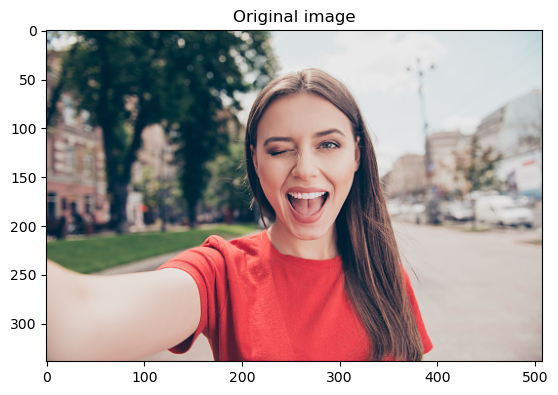

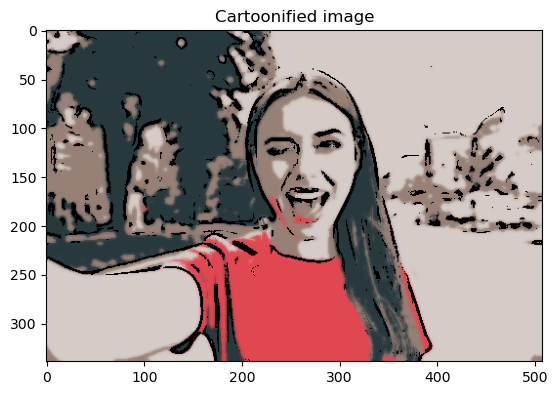

In [10]:
cartoon()